# [재난] 타이타닉 : 누가 살아남았을까 ?

#### 1912년 4월 15일, 타이타닉은 항해중 빙산과의 충돌로 인해 침몰합니다. 탑승인원 2224명 중 1502명이 사망한 비극적인 사건이었고, 선박의 안전규정을 개선시키는 계기가 됨.
#### 어떤 종류의 사람들이 많이 살아남았는지에 대한 분석을 해야한다.
#### 머신러닝을 이용해 어떤 승객이 생존했을지 예측해보자
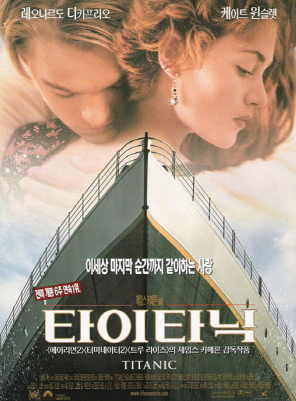


In [1]:
import pandas as pd
import numpy as np

In [2]:
titanic_train = pd.read_csv('/Users/1eeseo/Desktop/data/titanic_train.csv')
titanic_test = pd.read_csv('/Users/1eeseo/Desktop/data/titanic_test.csv')
titanic_submission = pd.read_csv('/Users/1eeseo/Desktop/data/titanic_submission.csv')

titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
# 컬럼 수가 많으니까 이 중 몇개를 추리기 -> 상관 관계 분석
# 상관분석 : 두 변수간에 어떤 선형적인 관계를 갖고 있는지 분석하는 방법
# 이때 두 변수간의 관계의 강도 : 상관관계
# 상관계수 : 두 변수간의 연관된 정도만 나타낼 뿐 인과관계 설명 X

titanic_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [6]:
# 문자열 데이터 -> 수치형 데이터
# 남자 -> 0
# 여자 -> 1
titanic_train['Sex'] = titanic_train['Sex'].replace('male',0)
titanic_test['Sex'] = titanic_test['Sex'].replace('male',0)

In [7]:
titanic_train['Sex'] = titanic_train['Sex'].replace('female',1)
titanic_test['Sex'] = titanic_test['Sex'].replace('female',1)

In [8]:
titanic_train.head(3)

#sex가 바뀐 것을 확인할 수 있죵?

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [9]:
titanic_train.isnull().sum()

# age 는 없는 컬럼을 삭제해주자
# Cabin은 독립변수로 안쓸거라서 별다른 전처리 X
# Embarked 은 S,C,Q 를 범주형으로 전환 / null 2개 제거한 후 상관관계 분석 통해 채워주기

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
titanic_train2 = titanic_train.dropna(subset=['Embarked'])

In [11]:
import copy
titanic_train2 = titanic_train2.copy()
titanic_train2.loc[titanic_train2['Embarked'] == 'C','Embarked']=0
titanic_train2.loc[titanic_train2['Embarked'] == 'Q','Embarked']=1
titanic_train2.loc[titanic_train2['Embarked'] == 'S','Embarked']=2

In [12]:
titanic_train2.info()

#아직 Embarked 의 타입이 오브젝트

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int64  
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 90.3+ KB


In [13]:
titanic_train2['Embarked'] = titanic_train2['Embarked'].astype(int)

# 인트 타입으로 바꿔주긔 ~

In [14]:
titanic_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int64  
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 90.3+ KB


In [15]:
# 특정 컬럼과 나머지 컬럼간의 상관계수 계산
titanic_train2.corrwith(titanic_train2['Embarked'])

# Fare와 가장 연관성이 뛰어남 -> Fare를 살펴보고 Embarked를 채워보자

PassengerId    0.013166
Survived      -0.169718
Pclass         0.164681
Sex           -0.110320
Age           -0.032565
SibSp          0.068900
Parch          0.040449
Fare          -0.226311
Embarked       1.000000
dtype: float64

In [16]:
titanic_train[titanic_train['Embarked'].isnull()]

#Fare 값 80 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


In [17]:
titanic_train[titanic_train['Fare'] == 80.0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


In [18]:
titanic_train[titanic_train['Pclass'] == 1]['Embarked'].value_counts()

S    127
C     85
Q      2
Name: Embarked, dtype: int64

In [19]:
titanic_train[titanic_train['Survived'] == 1]['Embarked'].value_counts()

S    217
C     93
Q     30
Name: Embarked, dtype: int64

In [20]:
titanic_train['Embarked'].value_counts()

#획실히 S 가 많으니 결측치를 S 로 채우겠슴둥 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
titanic_train['Embarked'] = titanic_train['Embarked'].fillna('S')

In [22]:
titanic_train.isnull().sum()

# 결측치 사라졌당 ^_^ 굿

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [63]:
# 이제 카피본 말고 진짜 해보자
titanic_train.loc[titanic_train['Embarked'] == 'C','Embarked']=0
titanic_train.loc[titanic_train['Embarked'] == 'Q','Embarked']=1
titanic_train.loc[titanic_train['Embarked'] == 'S','Embarked']=2

In [66]:
titanic_test.loc[titanic_test['Embarked'] == 'C','Embarked']=0
titanic_test.loc[titanic_test['Embarked'] == 'Q','Embarked']=1
titanic_test.loc[titanic_test['Embarked'] == 'S','Embarked']=2

In [64]:
titanic_train['Embarked'] = titanic_train['Embarked'].astype('int64')

In [67]:
titanic_test['Embarked'] = titanic_test['Embarked'].astype('int64')

In [25]:
titanic_train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,0.162098
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,-0.108262
Age,0.036847,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.030394
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,0.039798
Fare,0.012658,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,-0.224719
Embarked,0.013128,-0.167675,0.162098,-0.108262,-0.030394,0.068230,0.039798,-0.224719,1.000000


In [26]:
#test 값도 null값을 매꾸긔

titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [27]:
titanic_test[titanic_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S


In [28]:
# Fare열과 Pclass 열의 상관관계가 높으므로 Pclass 가 3인 행들의 Fare 열의 분포를 살펴보자

fare = pd.DataFrame(titanic_test[titanic_test['Pclass'] == 3]['Fare'].value_counts().nlargest(12))
fare = fare.reset_index()
fare

,index,Fare
0,7.7500,21
1,8.0500,17
2,7.8958,11
3,7.7750,10
4,7.2292,9
5,7.2250,9
6,8.6625,8
7,7.8542,8
8,7.8792,6
9,7.2500,5


In [29]:
fare['index'].mean()

8.395141666666667

In [30]:
titanic_test['Fare'] = titanic_test['Fare'].fillna("7.753825")

In [31]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

## 정규화와 표준화
#### 정규화 : -1 ~ 1 사이의 값으로 변환
#### 표준화 : 평균이 0이고 표준편차가 1인 값으로 변환

In [32]:
def normalize(x):
    return(x-x.min())/(x-max()-x.min())

In [33]:
def standardscaler(x):
    return(x-x.mean())/x.std

#std : 표준화

In [34]:
# 정규화와 표준화 같은 경우 패키지로도 잘 나와있기 때문에 위처럼 정의해도 정의 해도 되고, 패키지를 써도 됨

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(titanic_train[['Fare']])
train_fare = ss.transform(titanic_train[['Fare']])
test_fare = ss.transform(titanic_test[['Fare']])

In [35]:
titanic_train['Fare2'] = train_fare
titanic_test['Fare2'] = test_fare

In [36]:
titanic_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare2
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2,-0.502445
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0,0.786845
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,-0.488854


### 데이터 정제하긔 ~

In [37]:
# 데이터가 완성되지 않은 age, cabin 은 변수에서 제거해주자

titanic_train = titanic_train.drop(['Age', 'Cabin'], axis = 1)
titanic_test = titanic_test.drop(['Age', 'Cabin'], axis = 1)

KeyError: "['Age' 'Cabin'] not found in axis"

In [55]:
titanic_train = titanic_train.drop(['Name', 'Ticket'], axis = 1)
titanic_test = titanic_test.drop(['Name', 'Ticket'], axis = 1)

In [56]:
titanic_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Fare2          0
dtype: int64

In [57]:
titanic_train

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Fare2
0,1,0,3,0,1,0,7.2500,2,-0.502445
1,2,1,1,1,1,0,71.2833,0,0.786845
2,3,1,3,1,0,0,7.9250,2,-0.488854
3,4,1,1,1,1,0,53.1000,2,0.420730
4,5,0,3,0,0,0,8.0500,2,-0.486337
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,0,13.0000,2,-0.386671
887,888,1,1,1,0,0,30.0000,2,-0.044381
888,889,0,3,1,1,2,23.4500,2,-0.176263
889,890,1,1,0,0,0,30.0000,0,-0.044381


In [58]:
titanic_test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Fare2          0
dtype: int64

In [68]:
titanic_test

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,Fare2
0,892,3,0,0,0,7.8292,1,-0.490783
1,893,3,1,1,0,7.0,2,-0.507479
2,894,2,0,0,0,9.6875,1,-0.453367
3,895,3,0,0,0,8.6625,2,-0.474005
4,896,3,1,1,1,12.2875,2,-0.401017
...,...,...,...,...,...,...,...,...
413,1305,3,0,0,0,8.05,2,-0.486337
414,1306,1,1,0,0,108.9,0,1.544246
415,1307,3,0,0,0,7.25,2,-0.502445
416,1308,3,0,0,0,8.05,2,-0.486337


In [70]:
#모델의 훈련을 위해 설명변수와 반응변수를 분리

X_train = titanic_train.drop(['PassengerId','Survived'], axis=1)
Y_train = titanic_train['Survived']
X_test = titanic_test.drop('PassengerId', axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

### 기본적인 로지스틱 모델을 생성/예측하기

In [71]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [72]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

/Users/1eeseo/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
Y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [83]:
logreg.score(X_train, Y_train)

0.7912457912457912

In [76]:
titanic_submission['Survived'] = Y_pred

In [77]:
titanic_submission.to_csv('submission.csv', index = False)

In [78]:
titanic_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [81]:
titanic_test.shape, titanic_train.shape

((418, 8), (891, 9))

In [82]:
titanic_submission.to_csv('TITANIC_SUBMISSION.csv', index = False)